# Simple Linear Regression Model

In [12]:
import warnings 
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Modeling the Petrol Consumption in U.S. States 

In [14]:
train = pd.read_csv('petrol_consumption_train.csv')

train.head()

,Petrol_tax,Per_capita_income,Paved_highways,Prop_license,Petrol_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Creating a pairwise plot of all the variables in the dataset and correlation matrix of all the variables. I wanted to determine which variable has the highest linear correlation with `Petrol_consumption`


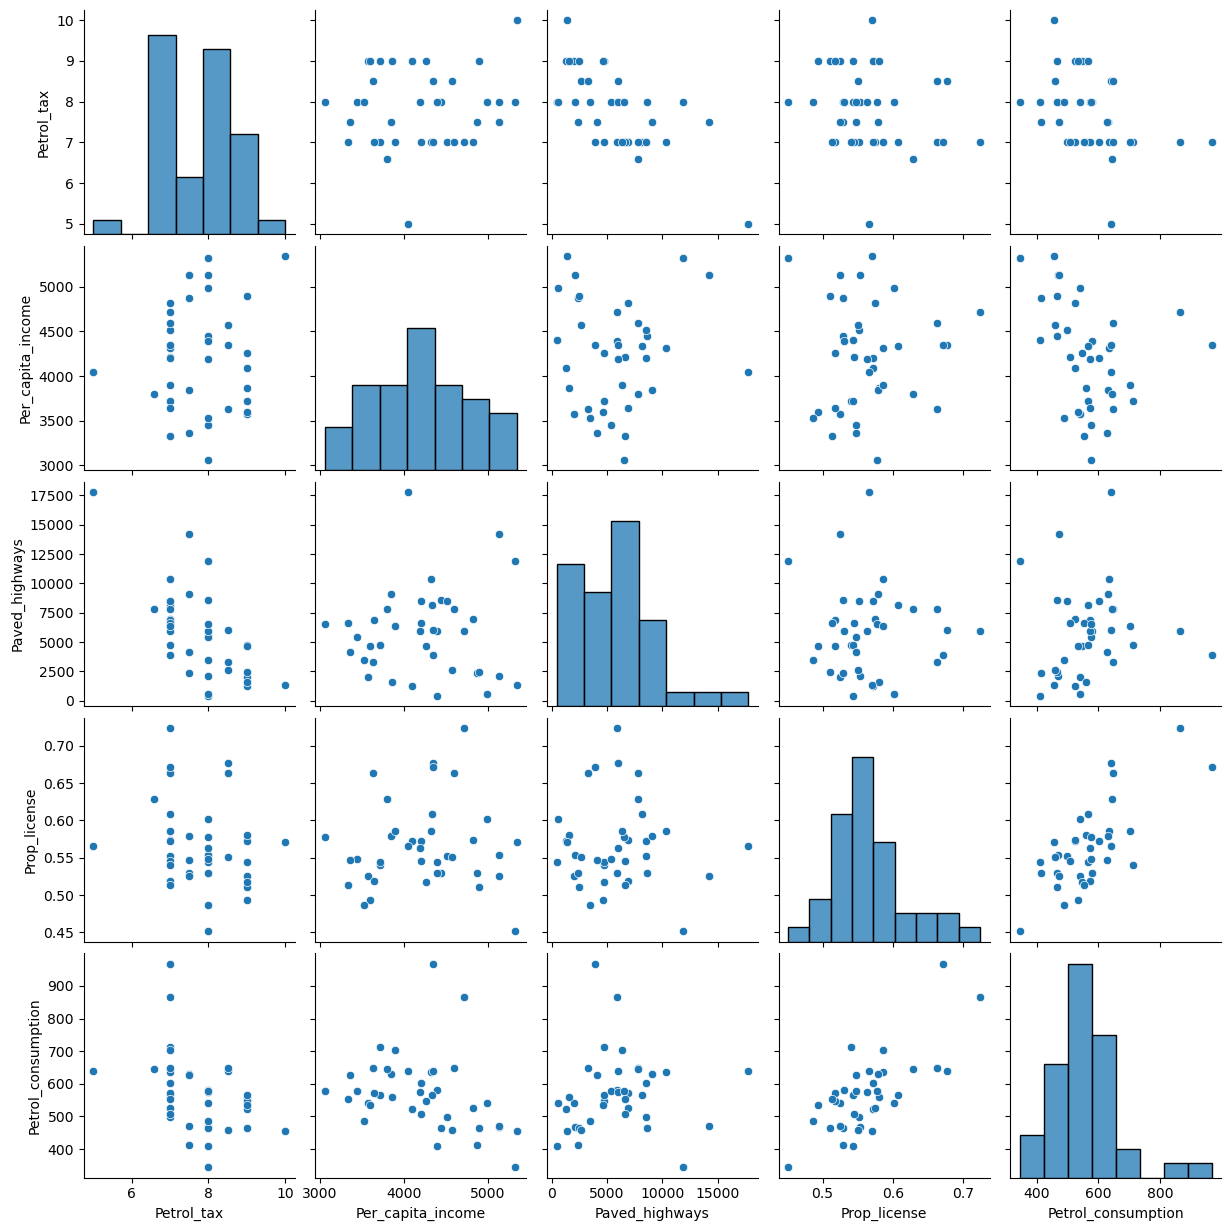

In [15]:
sns.pairplot(train)

In [16]:
matrix = train.corr()
print(matrix)

                    Petrol_tax  Per_capita_income  Paved_highways  \
Petrol_tax            1.000000           0.082359       -0.660022   
Per_capita_income     0.082359           1.000000        0.040256   
Paved_highways       -0.660022           0.040256        1.000000   
Prop_license         -0.223920           0.048153       -0.037998   
Petrol_consumption   -0.393415          -0.314039        0.098117   

                    Prop_license  Petrol_consumption  
Petrol_tax             -0.223920           -0.393415  
Per_capita_income       0.048153           -0.314039  
Paved_highways         -0.037998            0.098117  
Prop_license            1.000000            0.718303  
Petrol_consumption      0.718303            1.000000  


Prop_license has the highest correlation with petrol_consumption

Fitting a simple linear regression model to predict `Petrol_consumption` using the column found as the only predictor.

In [17]:
ols_object = smf.ols(formula = 'Petrol_consumption~Prop_license', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_consumption   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     40.51
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.80e-07
Time:                        23:13:46   Log-Likelihood:                -231.59
No. Observations:                  40   AIC:                             467.2
Df Residuals:                      38   BIC:                             470.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -267.6155    132.038     -2.027      0.050    -534.912      -0.319
Prop_license  1479.1803    232.414      6.364      0.000    1008.682    1949.678
==============================================================================
Omnibus:                        5.963   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.620
Skew:                           0.762   Prob(JB):                       0.0993
Kurtosis:                       3.670   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept       -267.615539
Prop_license    1479.180332
dtype: float64

The slope of the model is 1479.180332 which is how much the petrol consumption would increase if the predictor increases by 1. 

In [19]:
1479.180332*0.05

73.9590166

The prob of f-statistic is less than 0.05, which means petrol consumption has a statistically significant relationship with the predictor.

51.6% of the variance can be explained because of the r-squared value 

Predicting the petrol consumption for a state in which 50% of the population has a driver’s license and calculating the confidence interval and the prediction interval. 

In [20]:
fifty_perc = pd.DataFrame({'Prop_license': [0.5]})
conf_int = model.get_prediction(fifty_perc)
conf_int.summary_frame(alpha = 0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,471.974627,19.896237,431.6968,512.252454,302.822725,641.126528


The confidence interval for the prediction is approximately [431.70,512.25]
The prediction interval for the prediction is approximately [302.82,641.13]

The prediction interval is wider as it must account for both the uncertainty in estimating the population mean, plus the random variation of the individual values

Predicting the petrol consumption for a state in which 10% of the population has a driver’s license.

In [21]:
petrol_consumption2 = pd.DataFrame({'Prop_license': [0.1]})
summary2 = model.get_prediction(petrol_consumption2)
summary2.summary_frame(alpha = 0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-119.697506,108.929769,-340.214295,100.819283,-394.684264,155.289251


People can't have negative petrol consumption, so this is not a reasonable outcome. 

Calculating the residual standard error of the model

In [22]:
np.sqrt(model.mse_resid)

81.15342760294634

Using the trained model, I want to predict the petrol consumption of the observations in **petrol_consumption_test.csv** and find the RMSE.

In [23]:
test = pd.read_csv('petrol_consumption_test.csv')
test.head()
pred = model.predict(test)
np.sqrt(((pred-test.Petrol_consumption)**2).mean())

80.13903941152402

The RMSE is 80.1 million gallons.

The residual standard error on the training data is close to the RMSE on the test data. This shows that the performance of the model on unknown data is comparable to its performance on known data. This implies that the model is not overfitting. If it was overfit then the RSE would be significantly lower than the RMSE. 

Making a scatterplot of `Petrol_consumption` vs. the predictor using **petrol_consumption_test.csv**. Over the scatterplot, I plotted the regression line, the prediction interval and the confidence interval.


In [24]:
#interval 
intervals = model.get_prediction(test)
interval_table = intervals.summary_frame(alpha = 0.05)
interval_table

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,658.351349,19.048645,619.789384,696.913314,489.599793,827.102904
1,565.162988,12.843855,539.161962,591.164014,398.831644,731.494331
2,624.330201,15.521328,592.908915,655.751487,457.065860,791.594541
3,483.808069,18.514129,446.328174,521.287965,315.300488,652.315651
4,726.393644,27.895829,669.921491,782.865797,552.672124,900.115164
5,576.996430,12.896737,550.888351,603.104510,410.648319,743.344542
6,653.913808,18.539276,616.383005,691.444610,485.394896,822.432719
7,609.538398,14.342941,580.502631,638.574164,442.705733,776.371063


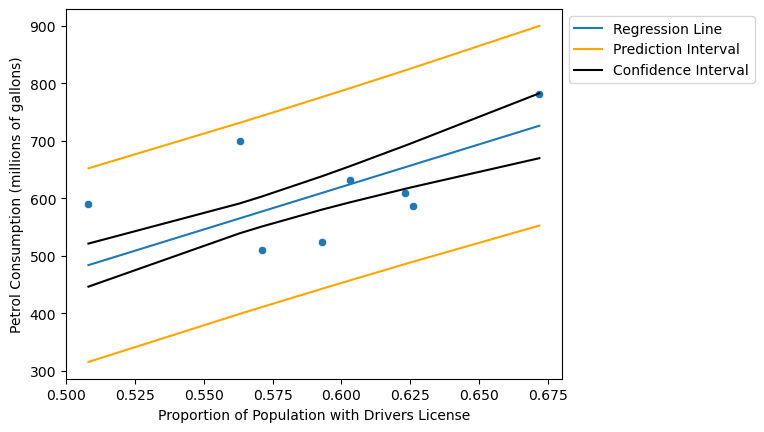

In [25]:
sns.scatterplot(x = test.Prop_license, y = test.Petrol_consumption, data = test)
#regression
sns.lineplot(x = test.Prop_license, y = pred, data = test, label='Regression Line')
#prediction interval
sns.lineplot(x = test.Prop_license, y = interval_table.obs_ci_lower, data = test, color = 'orange', label='Prediction Interval')
sns.lineplot(x = test.Prop_license, y = interval_table.obs_ci_upper, data = test, color = 'orange')
#confidence interval
sns.lineplot(x = test.Prop_license, y = interval_table.mean_ci_lower, data = test, color = 'black', label='Confidence Interval')
sns.lineplot(x = test.Prop_license, y = interval_table.mean_ci_upper, data = test, color = 'black')

plt.xlabel('Proportion of Population with Drivers License')
plt.ylabel('Petrol Consumption (millions of gallons)')
plt.legend(bbox_to_anchor=(1, 1))

In [26]:
print(train.corr()['Petrol_consumption'])

Petrol_tax           -0.393415
Per_capita_income    -0.314039
Paved_highways        0.098117
Prop_license          0.718303
Petrol_consumption    1.000000
Name: Petrol_consumption, dtype: float64


Paved_highways has the lowest absolute correlation with 'Petrol_consumption'. It would have the lowest R-squared value if used as a predictor in a simple linear regression model for 'Petrol_consumption'.

## Reproducing the Results with Scikit-Learn

In [27]:
model = LinearRegression()

X_train = train[['Prop_license']]
Y_train = train[['Petrol_consumption']]
X_test = test[['Prop_license']]
Y_test = test[['Petrol_consumption']].to_numpy()

model.fit(X_train,Y_train)

print("coefficient is ", model.coef_)
print("intercept is ", model.intercept_)

coefficient is  [[1479.18033214]]
intercept is  [-267.6155393]


In [28]:
predictions = model.predict(X_test)

y_pred = model.predict(X_test)

#rmse
model_rmse = np.sqrt(np.mean((y_pred - Y_test)**2))
print('RMSE:',model_rmse)
#r-squared
r_squared = model.score(X_train, Y_train)
print("r^2:", r_squared)
#rse
residuals = Y_test - predictions
rse = np.sqrt(np.mean(residuals**2))
print("RSE:",rse)



RMSE: 80.13903941152402
r^2: 0.5159591573694484
RSE: 80.13903941152402


Differences between Scikit-learn and statsmodel

1) Scikit-learn does not create a model summary with coefficents and p-values in a table as shown in 4b

2) Scikit-learn does not provide confidence and prediction intervals 

Scikit-learn tends to focus more on the machine learning elements rather than providing extensive statistical data from a model. It typically offers basic statistical measures and is less concerned with detailed statistical inference.

# Exploratory Analysis

Fitting a simple linear regression model to predict `Petrol_consumption` based on the predictor without an intercept term.

Without an intercept means that the equation becomes $Y = \beta_1X$. The intercept term, $\beta_0$, becomes 0.

In [29]:
ols_object_2 = smf.ols(formula='Petrol_consumption ~ Prop_license - 1', data=train)
model_2 = ols_object_2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_consumption   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1853.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                    1.71e-34
Time:                        23:13:52   Log-Likelihood:                         -233.64
No. Observations:                  40   AIC:                                      469.3
Df Residuals:                      39   BIC:                                      471.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Prop_license  1010.3504     23.469     43.051      0.000     962.880    1057.821
==============================================================================
Omnibus:                       13.327   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.181
Skew:                           1.081   Prob(JB):                     0.000505
Kurtosis:                       5.105   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicting the petrol consumption for the observations in **petrol_consumption_test.csv** using the model without an intercept and find the RMSE.

In [30]:
predictions = model_2.predict(test)
mse = mean_squared_error(test['Petrol_consumption'], predictions)
rmse_2 = np.sqrt(mse)

print("RMSE:", rmse_2)

RMSE: 76.398744492552


The RMSE is around 76.4 million gallons.